# 1. Umbralizado (thresholding) en un Arreglo (numpy)

## Umbralización de Imágenes

La línea `binary_array = np.where(array > 128, 255, 0)` realiza la **umbralización**.  Este proceso compara cada valor del arreglo original (`array`) con un umbral (128 en este caso).

*   Si el valor de un píxel es **mayor** que el umbral, se asigna el valor 255 (blanco) al nuevo arreglo (`binary_array`).
*   Si el valor es **menor o igual** que el umbral, se asigna el valor 0 (negro).

El resultado es una imagen binaria (solo contiene blanco y negro).
---
### ¿Para qué se usa la umbralización?

La umbralización es una técnica fundamental en el procesamiento de imágenes que se utiliza para:

*   **Segmentación de imágenes:** Separar objetos o regiones de interés del fondo de una imagen.  Por ejemplo, identificar células en una imagen microscópica.
*   **Reducción de ruido:** Eliminar píxeles no deseados o ruido visual.  Útil para limpiar imágenes con baja calidad.
*   **Simplificación de imágenes:** Convertir imágenes complejas en formas más simples para su análisis.  Facilita el procesamiento posterior.
*   **Preprocesamiento:** Preparar imágenes para otras técnicas de procesamiento más avanzadas.  Un paso inicial común en muchos flujos de trabajo.
---
### ¿Dónde se podría usar?

La umbralización se puede utilizar en una gran variedad de aplicaciones, como por ejemplo:

*   **Visión por computadora:** Detectar objetos en imágenes o videos.  Reconocer personas, vehículos, etc.
*   **Reconocimiento de caracteres (OCR):** Aislar letras y números en documentos escaneados.  Permite la digitalización de textos.
*   **Análisis de imágenes médicas:** Identificar tumores u otras anomalías en radiografías o resonancias magnéticas.  Ayuda en el diagnóstico médico.
*   **Procesamiento de imágenes satelitales:** Clasificar diferentes tipos de terreno o vegetación.  Útil en agricultura, medio ambiente, etc.
*   **Control de calidad industrial:** Detectar defectos en productos manufacturados.  Asegura la calidad de los productos.


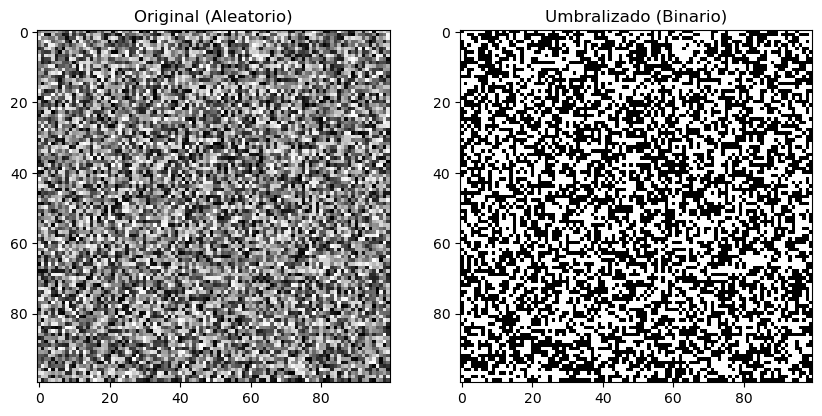

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Crear arreglo aleatorio y aplicar umbral
array = np.random.randint(0, 256, (100, 100), dtype=np.uint8)
binary_array = np.where(array > 128, 255, 0)

# Visualizar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(array, cmap='gray'), plt.title("Original (Aleatorio)")
plt.subplot(1, 2, 2), plt.imshow(binary_array, cmap='gray'), plt.title("Umbralizado (Binario)")
plt.show()

# 2. Detección de Bordes en Imagen de Internet (OpenCV + requests)

## Detección de Bordes con el Algoritmo de Canny

El **detector de bordes Canny** es un algoritmo sofisticado que utiliza múltiples pasos para detectar bordes de manera precisa.  

Los dos umbrales se utilizan para determinar qué bordes son "fuertes" y cuáles son "débiles":  

- Bordes con gradientes de intensidad **mayores que el umbral superior** (200 en este caso) se consideran **bordes fuertes**.  
- Bordes con gradientes **menores que el umbral inferior** (100) se descartan.  
- Bordes con gradientes **entre los dos umbrales** se consideran **bordes débiles** y se mantienen solo si están conectados a bordes fuertes.  

Ajustar estos umbrales es crucial para obtener buenos resultados.

---

### ¿Para qué se usa la detección de bordes?

La **detección de bordes** es una técnica fundamental en visión por computadora y procesamiento de imágenes que se utiliza para:

- **Segmentación de imágenes:** Identificar los límites de los objetos en una imagen.  
- **Reconocimiento de objetos:** Los bordes son características importantes para reconocer formas y objetos.  
- **Análisis de formas:** Extraer información sobre la forma de los objetos.  
- **Visión artificial:** En robótica, se usa para la navegación y manipulación de objetos.  

---

### ¿Dónde se podría usar?

La detección de bordes se utiliza en una amplia variedad de aplicaciones, incluyendo:

- **Inspección industrial:** Detectar defectos en productos.  
- **Medicina:** Análisis de imágenes médicas para identificar estructuras anatómicas o anomalías.  
- **Vehículos autónomos:** Detección de carriles y otros vehículos.  
- **Fotografía:** En algunos filtros y efectos especiales.  
- **Reconocimiento facial:** Los bordes de los rasgos faciales son importantes para el reconocimiento.  


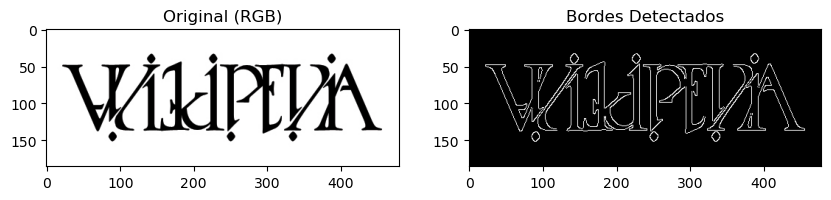

In [2]:
import requests
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Descargar imagen (reemplazar URL)
url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Ambigrama_de_Wikipedia.jpg"
response = requests.get(url, stream=True)
image_pil = Image.open(response.raw)
image_rgb = np.array(image_pil)

# Convertir a escala de grises y detectar bordes
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 200)

# Visualizar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image_rgb), plt.title("Original (RGB)")
plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray'), plt.title("Bordes Detectados")
plt.show()

# 3. Ecualización de Histograma en Fotografía Local (OpenCV)

## Ecualización de Histograma en Imágenes

### ¿Cómo funciona la técnica?

La **ecualización de histograma** es una técnica de procesamiento de imágenes que mejora el contraste ajustando la distribución de intensidades en una imagen en escala de grises.  
El proceso sigue estos pasos:

1. Convertir la imagen a escala de grises.
2. Calcular el histograma de la imagen y su función de distribución acumulativa (CDF).
3. Reasignar los valores de píxeles utilizando la CDF para distribuir mejor las intensidades.
4. Generar una nueva imagen con un mejor contraste.

---

### ¿Para qué se usa?

La **ecualización de histograma** se usa principalmente para mejorar la calidad visual de una imagen y facilitar su análisis en distintas aplicaciones:

- **Mejorar el contraste:** Hace más visibles los detalles en imágenes con poca iluminación.
- **Preprocesamiento en visión artificial:** Mejora la calidad de imágenes antes de aplicar otros algoritmos.
- **Normalización de imágenes:** Permite comparar imágenes tomadas en condiciones de iluminación diferentes.
- **Resaltado de detalles:** Útil en aplicaciones médicas o de seguridad para hacer más visibles ciertas estructuras.

---

### ¿Dónde se podría usar?

La ecualización de histograma se aplica en diversas áreas, como:

- **Imágenes médicas:** Mejora el contraste en radiografías o resonancias magnéticas.  
- **Visión por computadora:** Optimiza imágenes para tareas de detección y reconocimiento de objetos.  
- **Fotografía digital:** Corrige imágenes con iluminación deficiente.  
- **Videovigilancia:** Aclara imágenes tomadas en condiciones de baja luz.  
- **Análisis satelital:** Mejora la visualización de detalles en imágenes capturadas desde el espacio.  


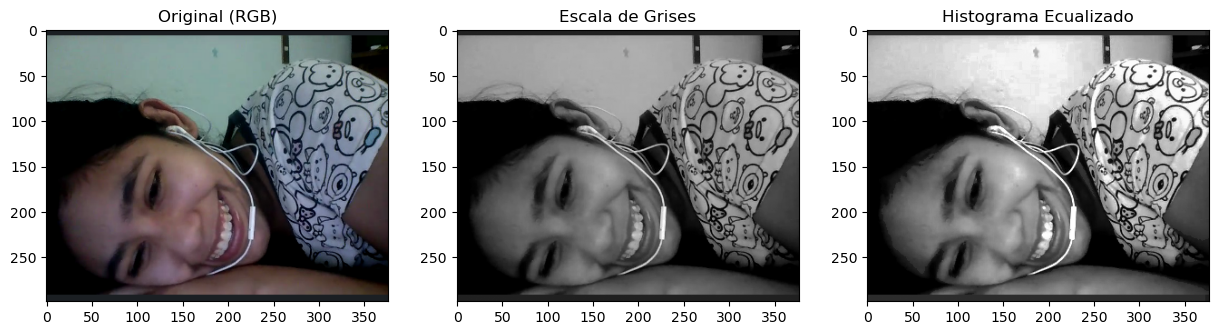

In [3]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen
image = cv2.imread("foto.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)

# Convertir BGR a RGB para visualización
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualizar
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(image_rgb), plt.title("Original (RGB)")
plt.subplot(1, 3, 2), plt.imshow(gray, cmap='gray'), plt.title("Escala de Grises")
plt.subplot(1, 3, 3), plt.imshow(equalized, cmap='gray'), plt.title("Histograma Ecualizado")
plt.show()

# 4. Desenfoque Gaussiano en Video (OpenCV)

### ¿Cómo funciona la técnica?

El **desenfoque gaussiano** es una técnica de procesamiento de imágenes que se utiliza para suavizar una imagen o un video. Este proceso atenúa los detalles no deseados o el ruido, creando una imagen más suave y más fácil de analizar. En el código, se utiliza un filtro gaussiano sobre cada fotograma del video, aplicando un **desenfoque** con un tamaño de núcleo de 15x15 píxeles. La función gaussiana otorga mayor peso a los píxeles más cercanos al píxel central y menor peso a los píxeles más alejados. Esto provoca el efecto de desenfoque, ya que los píxeles más cercanos tienen una mayor influencia en el valor final del píxel central.

---

### ¿Para qué se usa?

El desenfoque gaussiano se utiliza en una amplia variedad de situaciones, principalmente para:

- **Reducción de ruido:** Suaviza las imágenes o videos para disminuir los efectos del ruido.
- **Preprocesamiento:** Es utilizado como una técnica de preprocesamiento en visión por computadora antes de aplicar otras técnicas como la detección de bordes o segmentación.
- **Mejora de imágenes:** Atenúa detalles irrelevantes para enfocar la atención en características más importantes de la imagen o video.
- **Efectos visuales:** Se emplea en cine, fotografía y diseño gráfico para crear transiciones suaves y mejorar la estética.

---

### ¿Dónde se podría usar?

El desenfoque gaussiano puede tener aplicaciones en diversos campos:

- **Visión por computadora:** Como preprocesamiento para detectar bordes, objetos o patrones.
- **Análisis de video:** En vigilancia y seguridad, para limpiar secuencias de video y reducir el ruido.
- **Reconocimiento de rostros:** Para suavizar las imágenes y mejorar la precisión en sistemas de reconocimiento facial.
- **Filtrado de imágenes:** En fotografía digital, para aplicar efectos o suavizar imágenes con demasiado detalle.
- **Medicina:** Para suavizar imágenes médicas como radiografías o resonancias magnéticas antes de aplicar técnicas de diagnóstico.


In [4]:
import cv2

# Capturar el video
cap = cv2.VideoCapture("video.mp4")

if not cap.isOpened():
    print("Error al abrir el video.")
    exit()

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Fin del video, 'q' para salir.")
        key = cv2.waitKey(0)  # Pausa hasta que se presione una tecla
        if key & 0xFF == ord('q'):
            break  # Salir si se presiona 'q'

    # Aplicar desenfoque
    blurred_frame = cv2.GaussianBlur(frame, (15, 15), 0)

    # Mostrar los frames
    cv2.imshow("Frame Original", frame)
    cv2.imshow("Frame Desenfocado", blurred_frame)

    # Presionar 'q' para salir
    if cv2.waitKey(30) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

Fin del video, 'q' para salir.


# 5. Conversión de Espacio de Color (BGR a HSV)


## Conversión de Imágenes a Espacio de Color HSV

### ¿Cómo funciona la técnica?

La conversión de una imagen al espacio de color **HSV (Hue, Saturation, Value)** permite representar los colores de manera más intuitiva que el tradicional espacio **RGB**.  

El proceso sigue estos pasos:

1. **Cargar la imagen** en formato BGR (el formato por defecto de OpenCV).
2. **Convertirla a HSV**, donde:
   - **H (Tono):** Representa el color (0° a 360°).
   - **S (Saturación):** Indica la pureza del color.
   - **V (Valor o Brillo):** Determina la intensidad de la luz.
---

### ¿Para qué se usa?

El espacio de color **HSV** es ampliamente utilizado en visión por computadora y procesamiento de imágenes porque separa la información de color de la intensidad, lo que facilita muchas tareas como:

- **Segmentación de imágenes:** Permite identificar colores específicos con mayor precisión.  
- **Mejor detección de colores:** Es más robusto a cambios de iluminación que RGB.  
- **Preprocesamiento en visión artificial:** Simplifica tareas como detección de objetos.  
- **Ajuste de imágenes:** Se puede modificar el brillo y la saturación de forma independiente.  

---

### ¿Dónde se podría usar?

La conversión de imágenes a **HSV** se aplica en múltiples áreas, como:

- **Visión artificial:** Detección de objetos con base en su color, como detección de semáforos en vehículos autónomos.  
- **Filtros de imagen y efectos visuales:** Ajustar el tono y la saturación en edición de imágenes.  
- **Seguimiento de objetos en video:** Identificación de colores en tiempo real.  
- **Reconocimiento de señales de tránsito:** Los colores se diferencian mejor en HSV que en RGB.  
- **Procesamiento de imágenes médicas:** Resaltar ciertas características en imágenes obtenidas de microscopios.  



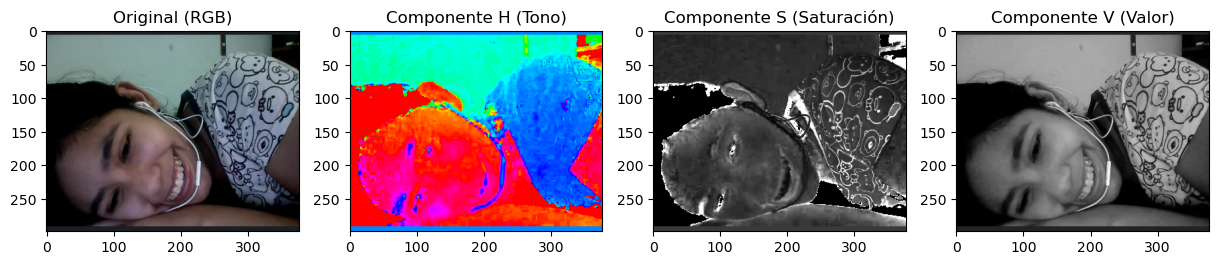

In [5]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen y convertir a HSV (reemplazar "foto.jpg" con tu ruta)
image = cv2.imread("foto.jpg")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Convertir BGR a RGB para visualización
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extraer componentes H, S, V de la imagen HSV
hue, saturation, value = cv2.split(hsv_image)

# Visualizar
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1), plt.imshow(image_rgb), plt.title("Original (RGB)")
plt.subplot(1, 4, 2), plt.imshow(hue, cmap='hsv'), plt.title("Componente H (Tono)")
plt.subplot(1, 4, 3), plt.imshow(saturation, cmap='gray'), plt.title("Componente S (Saturación)")
plt.subplot(1, 4, 4), plt.imshow(value, cmap='gray'), plt.title("Componente V (Valor)")
plt.show()